In [1]:
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import matplotlib as mpl
from shapely.geometry import Point
import plotly_express as px
import matplotlib.image as mpimg
import numpy as np

In [35]:
# Results folder:
interconn = 'WECC'
cap = 0

ResultsFolder = "C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\MacroCEM\\Model\\Python\\Results_WECC_NetZero_DACS2100_reference_TrueREFERENCE\\"

# Read in data:
cap_data = pd.read_csv(ResultsFolder + '2050CO2Cap' + str(cap) + '\\CE\\' +'genFleetAfterCE2050.csv')
Results_vN = cap_data[cap_data.YearAddedCE > 2020]

Results_vN.loc[Results_vN['PlantType'].str.contains('wind'), 'PlantType'] = 'Wind'
Results_vN.loc[Results_vN['PlantType'].str.contains('solar'), 'PlantType'] = 'Solar'

Results_vN['PlantType2'] = Results_vN['PlantType']
Results_vN.loc[Results_vN['PlantType2'].str.contains('Solar'), 'PlantType2'] = 'Renewable'
Results_vN.loc[Results_vN['PlantType2'].str.contains('Wind'), 'PlantType2'] = 'Renewable'

Results_vN = Results_vN.groupby(['region', 'PlantType2'], as_index=False).agg({'Capacity (MW)': 'sum', 'region': 'first', 'PlantType2': 'first'})
Results_vN['Capacity (GW)'] = Results_vN['Capacity (MW)']/1000
Results_vN

C:\Users\atpha\AppData\Local\Temp\ipykernel_16024\4095316819.py:8: DtypeWarning: Columns (1,2,4,5,8,9,10,12,19,20,21,22,23,26,27,30,31,32,44,48,50,56,60,74,75,90,91) have mixed types. Specify dtype option on import or set low_memory=False.
  cap_data = pd.read_csv(ResultsFolder + '2050CO2Cap' + str(cap) + '\\CE\\' +'genFleetAfterCE2050.csv')
C:\Users\atpha\AppData\Local\Temp\ipykernel_16024\4095316819.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Results_vN['PlantType2'] = Results_vN['PlantType']


,Capacity (MW),region,PlantType2,Capacity (GW)
0,6.364093e+03,AZ,Electrolyzer,6.364093
1,1.499909e+05,AZ,Nuclear,149.990887
2,1.013509e+06,AZ,Renewable,1013.508921
3,1.798781e+02,AZ,SMR,0.179878
4,1.040000e+03,AZ,SR,1.040000
5,5.385078e+03,CA,Combined Cycle,5.385078
6,8.269181e+04,CA,Electrolyzer,82.691812
7,4.239213e+06,CA,Nuclear,4239.213053
8,1.948050e+05,CA,Renewable,194.804967
9,5.696145e+04,CA,SMR,56.961450


In [36]:
# Read in base-map:
Basemap = gpd.read_file(r"C:\Users\atpha\Documents\Postdocs\Projects\MacroCEM\GIS\GIS_population_weight_EI\REEDS PCA\us_ic_data.shp")
if interconn == 'ERCOT':
    Basemap = Basemap[Basemap['IC']=='TX']
elif interconn == 'EI':
    Basemap = Basemap[Basemap['IC']=='EI']
elif interconn == 'WECC':
    Basemap = Basemap[Basemap['IC']=='WI']

Basemap = Basemap.reset_index()    
#fig, ax = plt.subplots(1, 1)
#Basemap.plot(column='PCA_REG',ax=ax, cmap='winter', legend=True)
state_wa = [1,2,3,4]
state_or = [5,6,7]
state_ca = [8,9,10,11]
state_nv = [12,13]
state_id = [14,15,16]
state_mt = [17,18,19,20]
state_wy = [21,22,23,24]
state_ut = [25,26]
state_az = [27,28,29,30]
state_nm = [31]
#transRegions['SD'] = [32]
state_co = [33,34]

state_wa.sort()
state_or.sort()
state_ca.sort()
state_nv.sort()
state_id.sort()
state_mt.sort()
state_wy.sort()
state_ut.sort()
state_az.sort()
state_nm.sort()
state_co.sort()

for i in list(range(len(state_wa))):
    state_wa[i] = 'p' + str(state_wa[i])
for i in list(range(len(state_or))):
    state_or[i] = 'p' + str(state_or[i])
for i in list(range(len(state_ca))):
    state_ca[i] = 'p' + str(state_ca[i])
for i in list(range(len(state_nv))):
    state_nv[i] = 'p' + str(state_nv[i])
for i in list(range(len(state_id))):
    state_id[i] = 'p' + str(state_id[i])
for i in list(range(len(state_mt))):
    state_mt[i] = 'p' + str(state_mt[i])
for i in list(range(len(state_wy))):
    state_wy[i] = 'p' + str(state_wy[i])
for i in list(range(len(state_ut))):
    state_ut[i] = 'p' + str(state_ut[i])
for i in list(range(len(state_az))):
    state_az[i] = 'p' + str(state_az[i])
for i in list(range(len(state_nm))):
    state_nm[i] = 'p' + str(state_nm[i])
for i in list(range(len(state_co))):
    state_co[i] = 'p' + str(state_co[i])

Basemap["region"] = np.where(Basemap["PCA_Code"].isin(state_wa), "WA", "Other")

for i in list(range(len(Basemap))):
    if Basemap["region"][i] == "Other":
        if Basemap["PCA_Code"][i] in state_or:
            Basemap["region"][i] = "OR"
        elif Basemap["PCA_Code"][i] in state_ca:
            Basemap["region"][i] = "CA"
        elif Basemap["PCA_Code"][i] in state_nv:
            Basemap["region"][i] = "NV"
        elif Basemap["PCA_Code"][i] in state_id:
            Basemap["region"][i] = "ID"
        elif Basemap["PCA_Code"][i] in state_mt:
            Basemap["region"][i] = "MT"
        elif Basemap["PCA_Code"][i] in state_wy:
            Basemap["region"][i] = "WY"
        elif Basemap["PCA_Code"][i] in state_ut:
            Basemap["region"][i] = "UT"
        elif Basemap["PCA_Code"][i] in state_az:
            Basemap["region"][i] = "AZ"
        elif Basemap["PCA_Code"][i] in state_nm:
            Basemap["region"][i] = "NM"
        elif Basemap["PCA_Code"][i] in state_co:
            Basemap["region"][i] = "CO"

Basemap


C:\Users\atpha\AppData\Local\Temp\ipykernel_16024\2864039791.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Basemap["region"][i] = "OR"
C:\Users\atpha\AppData\Local\Temp\ipykernel_16024\2864039791.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Basemap["region"][i] = "CA"
C:\Users\atpha\AppData\Local\Temp\ipykernel_16024\2864039791.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Basemap["region"][i] = "NV"
C:\Users\atph

,index,OBJECTID,PCA_REG,Shape_Leng,Shape_Area,PCA_Code,RTO_Code,IC,geometry,region
0,0,1,1,38.206478,5.205975,p1,rto1,WI,"MULTIPOLYGON (((-123.00126 47.13446, -123.0010...",WA
1,1,2,2,34.956800,7.651230,p2,rto1,WI,"MULTIPOLYGON (((-123.97219 46.48561, -123.9716...",WA
2,2,3,3,15.471963,6.551405,p3,rto1,WI,"POLYGON ((-117.31440 49.00000, -117.29996 48.9...",WA
3,3,4,4,5.741688,1.432429,p4,rto1,WI,"POLYGON ((-119.97301 46.73717, -119.97210 46.7...",WA
4,4,5,5,25.455348,13.701801,p5,rto1,WI,"MULTIPOLYGON (((-123.63787 46.17959, -123.6410...",OR
5,5,6,6,12.977242,5.384886,p6,rto1,WI,"POLYGON ((-123.70347 43.94513, -123.70370 43.9...",OR
6,6,7,7,17.418334,9.065501,p7,rto1,WI,"POLYGON ((-117.12600 45.08034, -117.09153 45.0...",OR
7,7,8,8,13.473947,4.253030,p8,rto2,WI,"POLYGON ((-121.33179 41.18389, -121.38959 41.1...",CA
8,8,9,9,45.293218,19.662976,p9,rto4,WI,"MULTIPOLYGON (((-119.02889 33.48762, -119.0287...",CA
9,9,10,10,29.172290,16.651295,p10,rto4,WI,"MULTIPOLYGON (((-118.59403 33.03595, -118.5931...",CA


In [37]:
# Attribute merge basemap and results:
vN_results = Basemap.merge(Results_vN, on='region')
vN_results

,index,OBJECTID,PCA_REG,Shape_Leng,Shape_Area,PCA_Code,RTO_Code,IC,geometry,region,Capacity (MW),PlantType2,Capacity (GW)
0,0,1,1,38.206478,5.205975,p1,rto1,WI,"MULTIPOLYGON (((-123.00126 47.13446, -123.0010...",WA,2.687102e+04,Electrolyzer,26.871023
1,0,1,1,38.206478,5.205975,p1,rto1,WI,"MULTIPOLYGON (((-123.00126 47.13446, -123.0010...",WA,1.369917e+06,Nuclear,1369.917002
2,0,1,1,38.206478,5.205975,p1,rto1,WI,"MULTIPOLYGON (((-123.00126 47.13446, -123.0010...",WA,3.207243e+03,Renewable,3.207243
3,0,1,1,38.206478,5.205975,p1,rto1,WI,"MULTIPOLYGON (((-123.00126 47.13446, -123.0010...",WA,1.983126e+04,SMR,19.831256
4,0,1,1,38.206478,5.205975,p1,rto1,WI,"MULTIPOLYGON (((-123.00126 47.13446, -123.0010...",WA,1.040000e+03,SR,1.040000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,33,34,34,20.965744,15.038679,p34,rto5,WI,"POLYGON ((-102.04981 39.57406, -102.04977 39.5...",CO,1.283303e+04,Electrolyzer,12.833026
165,33,34,34,20.965744,15.038679,p34,rto5,WI,"POLYGON ((-102.04981 39.57406, -102.04977 39.5...",CO,6.396669e+05,Nuclear,639.666870
166,33,34,34,20.965744,15.038679,p34,rto5,WI,"POLYGON ((-102.04981 39.57406, -102.04977 39.5...",CO,2.535554e+05,Renewable,253.555443
167,33,34,34,20.965744,15.038679,p34,rto5,WI,"POLYGON ((-102.04981 39.57406, -102.04977 39.5...",CO,3.255011e+03,SMR,3.255011


Text(0.5, 1.0, 'Wind+Solar PV Investments by 2050 (MW)')

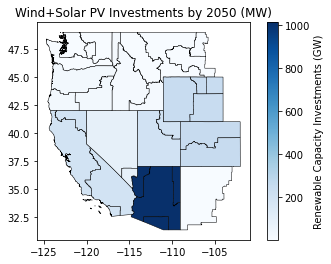

In [39]:
# Map investment capacity:
# Wind:
vN_Wind = vN_results.drop(vN_results[vN_results.PlantType2 !='Renewable'].index)
fig, ax = plt.subplots(1, 1)
vN_Wind.plot(column='Capacity (GW)',ax=ax, cmap='Blues', edgecolor = 'black', linewidth=0.5, legend=True,
            legend_kwds={'label': "Renewable Capacity Investments (GW)",'orientation': "vertical"})
ax.set_title('Wind+Solar PV Investments by 2050 (MW)')

Text(0.5, 1.0, 'Small Modular Reactors Investments by 2050 (GW)')

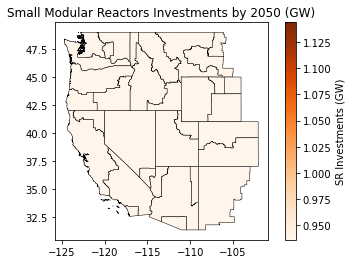

In [42]:
# SR:
vN_results = Basemap.merge(Results_vN, on='region')
vN_H2 = vN_results.drop(vN_results[vN_results.PlantType2 !='SR'].index)
fig, ax = plt.subplots(1, 1)
vN_H2.plot(column='Capacity (GW)',ax=ax, cmap='Oranges', edgecolor = 'black', linewidth=0.5, legend=True,
            legend_kwds={'label': "SR Investments (GW)",'orientation': "vertical"})
ax.set_title('Small Modular Reactors Investments by 2050 (GW)')

Text(0.5, 1.0, 'Steam Methane Reformer Investments by 2050 (ton)')

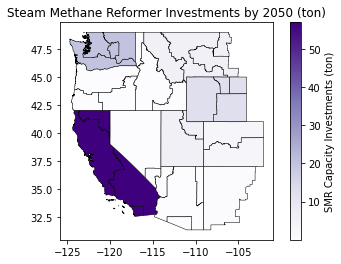

In [45]:
# SMR:
vN_results = Basemap.merge(Results_vN, on='region')
vN_Bat = vN_results.drop(vN_results[vN_results.PlantType2 !='SMR'].index)
fig, ax = plt.subplots(1, 1)
vN_Bat.plot(column='Capacity (GW)',ax=ax, cmap='Purples', edgecolor = 'black', linewidth=0.5, legend=True,
            legend_kwds={'label': "SMR Capacity Investments (ton)",'orientation': "vertical"})
ax.set_title('Steam Methane Reformer Investments by 2050 (ton)')

Text(0.5, 1.0, 'Electrolyzer Investments by 2050 (GW)')

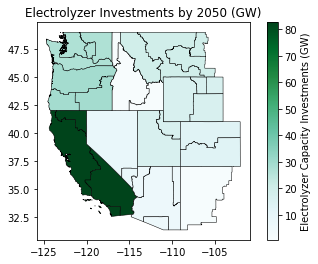

In [47]:
# Electrolyzer:
vN_results = Basemap.merge(Results_vN, on='region')
vN_Bat = vN_results.drop(vN_results[vN_results.PlantType2 !='Electrolyzer'].index)
fig, ax = plt.subplots(1, 1)
vN_Bat.plot(column='Capacity (GW)',ax=ax, cmap='BuGn', edgecolor = 'black', linewidth=0.5, legend=True,
            legend_kwds={'label': "Electrolyzer Capacity Investments (GW)",'orientation': "vertical"})
ax.set_title('Electrolyzer Investments by 2050 (GW)')

Text(0.5, 1.0, 'Nuclear Investments by 2050 (GW)')

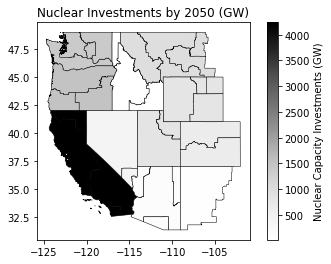

In [48]:
# Nuclear:
vN_results = Basemap.merge(Results_vN, on='region')
vN_Nu = vN_results.drop(vN_results[vN_results.PlantType2 !='Nuclear'].index)
fig, ax = plt.subplots(1, 1)
vN_Nu.plot(column='Capacity (GW)',ax=ax, cmap='Greys', edgecolor = 'black', linewidth=0.5, legend=True,
            legend_kwds={'label': "Nuclear Capacity Investments (GW)",'orientation': "vertical"})
ax.set_title('Nuclear Investments by 2050 (GW)')

Text(0.5, 1.0, 'NGCC Investments by 2050 (GW)')

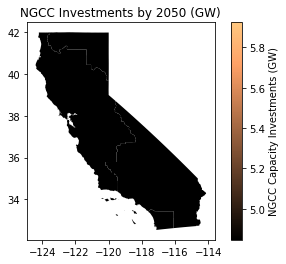

In [49]:
# CC CCS:
vN_results = Basemap.merge(Results_vN, on='region')
vN_CCCCS = vN_results.drop(vN_results[vN_results.PlantType2 !='Combined Cycle'].index)
fig, ax = plt.subplots(1, 1)
vN_CCCCS.plot(column='Capacity (GW)',ax=ax, cmap='copper', legend=True,
            legend_kwds={'label': "NGCC Capacity Investments (GW)",'orientation': "vertical"})
ax.set_title('NGCC Investments by 2050 (GW)')